In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
t0 = 5

if t0 == 5:
    t = ''
else:
    t = '_' + str(t0)

## sample

In [3]:
df = pd.read_csv('../results/results_sample{}.txt'.format(t), header = None)

In [4]:
df = df[df[1] != 1300]

In [5]:
df_rmse = df[df[2] == 'rmse_x']
df_cprs = df[df[2] == 'cprs_x']

df_rmseh = df[df[2] == 'rmse_z0']
df_cprsh = df[df[2] == 'cprs_z0']

## dimension

In [6]:
df2 = pd.read_csv('../results/results_dim{}.txt'.format(t), header = None)

df2 = df2.sort_values([0,1,2])
df_rmse2 = df2[df2[2] == 'rmse_x']
df_cprs2 = df2[df2[2] == 'cprs_x']

df_rmseh2 = df2[df2[2] == 'rmse_z0']
df_cprsh2 = df2[df2[2] == 'cprs_z0']

## noise

In [7]:
df3 = pd.read_csv('../results/results_noise{}.txt'.format(t), header = None)

df3 = df3.sort_values([0,1,2])
df_rmse3 = df3[df3[2] == 'rmse_x']
df_cprs3 = df3[df3[2] == 'cprs_x']

df_rmseh3 = df3[df3[2] == 'rmse_z0']
df_cprsh3 = df3[df3[2] == 'cprs_z0']

In [8]:

model_dict = {
    'neural': 'NODE',
    'expert': 'Expert',
    'residual': 'Residual',
    'ensemble2': 'Ensemble',
    'hybrid': 'LHM'
}

47    0.0035
11    0.0048
15    0.0040
Name: 4, dtype: float64


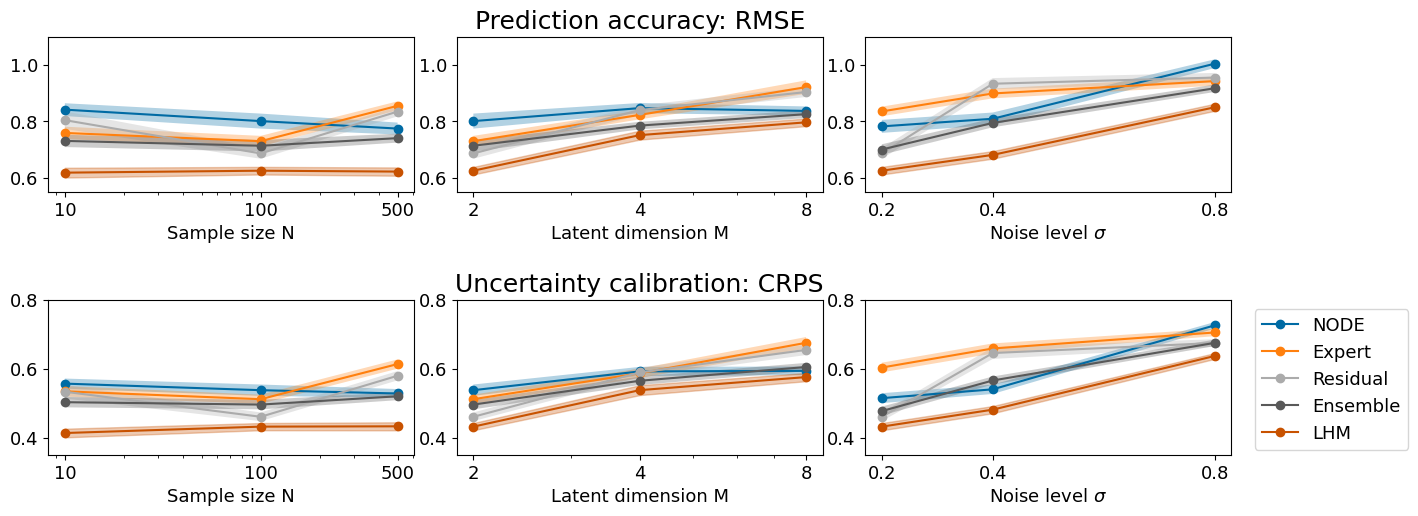

In [11]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(14,5))
# plt.style.use('seaborn-colorblind')
plt.style.use('tableau-colorblind10')
plt.rcParams['font.size'] = '13'

f=3

# RMSE-X-Sample
plt.subplot(231)
for n in model_dict.keys():
    dfs = df_rmse[df_rmse[0] == n]
    if n == 'hybrid':
        plt.fill_between(dfs[1] - 300, dfs[3] - f * dfs[4], dfs[3] + f * dfs[4], alpha=0.3, color=colors[5])
        plt.plot(dfs[1] - 300, dfs[3], 'o-', label=model_dict[n], color=colors[5])
    else:
        plt.fill_between(dfs[1] - 300, dfs[3] - f * dfs[4], dfs[3] + f * dfs[4], alpha=0.3)
        plt.plot(dfs[1] - 300, dfs[3], 'o-', label=model_dict[n])
        
# plt.title('RMSE')
plt.xscale('log')
plt.ylim(0.55, 1.1)
ax = plt.gca()
ax.set_xticks([10,100,500])
ax.set_xticklabels([10,100,500])
plt.xlabel('Sample size N')


# RMSE-X-Dim
plt.subplot(232)
for n in model_dict.keys():
    dfs = df_rmse2[df_rmse2[0] == n]
    
    if n == 'hybrid':
        plt.fill_between(dfs[1] - 4, dfs[3] - f * dfs[4], dfs[3] + f * dfs[4], alpha=0.3, color=colors[5])
        plt.plot(dfs[1] - 4, dfs[3], 'o-', label=model_dict[n], color=colors[5])
    else:
        plt.fill_between(dfs[1] - 4, dfs[3] - f * dfs[4], dfs[3] + f * dfs[4], alpha=0.3)
        plt.plot(dfs[1] - 4, dfs[3], 'o-', label=model_dict[n])
plt.title('Prediction accuracy: RMSE', size=18)
plt.ylim(0.55, 1.1)
plt.xscale('log')
ax = plt.gca()
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.set_xticks([2, 4, 8])
ax.set_xticklabels([2, 4, 8])
plt.xlabel('Latent dimension M')

# RMSE-X-Noise
plt.subplot(233)

for n in model_dict.keys():
    dfs = df_rmse3[df_rmse3[0] == n]
    
    if n == 'hybrid':
        plt.fill_between(dfs[1], dfs[3] - f * dfs[4], dfs[3] + f * dfs[4], alpha=0.3, color=colors[5])
        plt.plot(dfs[1], dfs[3], 'o-', label=model_dict[n], color=colors[5])
    else:
        plt.fill_between(dfs[1], dfs[3] - f * dfs[4], dfs[3] + f * dfs[4], alpha=0.3)
        plt.plot(dfs[1], dfs[3], 'o-', label=model_dict[n])
# plt.title('RMSE')
plt.ylim(0.55, 1.1)
# plt.xscale('log')
ax = plt.gca()
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.set_xticks([0.2, 0.4, 0.8])
ax.set_xticklabels([0.2, 0.4, 0.8])
plt.xlabel('Noise level $\sigma$')

# CRPS-X-Sample
plt.subplot(234)
for n in model_dict.keys():
    dfs = df_cprs[df_cprs[0] == n]
    
    if n == 'hybrid':
        plt.fill_between(dfs[1] - 300, dfs[3] - f * dfs[4], dfs[3] + f * dfs[4], alpha=0.3, color=colors[5])
        plt.plot(dfs[1] - 300, dfs[3], 'o-', label=model_dict[n], color=colors[5])
    else:
        plt.fill_between(dfs[1] - 300, dfs[3] - f * dfs[4], dfs[3] + f * dfs[4], alpha=0.3)
        plt.plot(dfs[1] - 300, dfs[3], 'o-', label=model_dict[n])
# plt.title('CRPS')
plt.ylim(0.35, 0.8)
plt.xscale('log')
ax = plt.gca()
ax.set_xticks([10,100,500])
ax.set_xticklabels([10,100,500])
plt.xlabel('Sample size N')


# CRPS-X-Dim
plt.subplot(235)
for n in model_dict.keys():
    dfs = df_cprs2[df_cprs2[0] == n]
    
    if n == 'hybrid':
        print(dfs[4])
        plt.fill_between(dfs[1] - 4, dfs[3] - f * dfs[4], dfs[3] + f * dfs[4], alpha=0.3, color=colors[5])
        plt.plot(dfs[1] - 4, dfs[3], 'o-', label=model_dict[n], color=colors[5])
    else:
        plt.fill_between(dfs[1] - 4, dfs[3] - f * dfs[4], dfs[3] + f * dfs[4], alpha=0.3)
        plt.plot(dfs[1] - 4, dfs[3], 'o-', label=model_dict[n])
plt.title('Uncertainty calibration: CRPS', size=18)
plt.xscale('log')
plt.xlabel('Latent dimension M')
plt.ylim(0.35, 0.8)
ax = plt.gca()
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.set_xticks([2, 4, 8])
ax.set_xticklabels([2, 4, 8])

# CRPS-X-Noise
plt.subplot(236)

for n in model_dict.keys():
    dfs = df_cprs3[df_cprs3[0] == n]
    
    if n == 'hybrid':
        plt.fill_between(dfs[1], dfs[3] - f * dfs[4], dfs[3] + f * dfs[4], alpha=0.3, color=colors[5])
        plt.plot(dfs[1], dfs[3], 'o-', label=model_dict[n], color=colors[5])
    else:
        plt.fill_between(dfs[1], dfs[3] - f * dfs[4], dfs[3] + f * dfs[4], alpha=0.3)
        plt.plot(dfs[1], dfs[3], 'o-', label=model_dict[n])
# plt.title('CRPS')
plt.ylim(0.35, 0.8)
# plt.xscale('log')
ax = plt.gca()
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.set_xticks([0.2, 0.4, 0.8])
ax.set_xticklabels([0.2, 0.4, 0.8])
plt.xlabel('Noise level $\sigma$')


plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout(pad=0.1)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

plt.savefig(fname='Fig3.png'.format(t), dpi=300)

In [10]:
df

,0,1,2,3,4
1,neural,310,rmse_x,0.8416,0.0076
5,expert,310,rmse_x,0.7588,0.0074
9,hybrid,310,rmse_x,0.6176,0.0058
13,residual,310,rmse_x,0.8043,0.0104
17,ensemble2,310,rmse_x,0.7305,0.0073
21,neural,400,rmse_x,0.8009,0.0089
25,expert,400,rmse_x,0.7295,0.0063
29,hybrid,400,rmse_x,0.6246,0.0045
33,residual,400,rmse_x,0.6859,0.0063
37,ensemble2,400,rmse_x,0.7132,0.0068
